In [1]:
from this_settings import *

INFO: Pandarallel will run on 28 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## Problem 4
Contrast ACF/PACF for actual and measured consumption. Download quarterly US series for consumption of non-durables (FRED database). Plot ACF/PACF. Compare your results with results and predictions in Mankiw (1982).

#### 4.1 Simulated data

In [3]:
## C is actual consumption, Chat is measured
np.random.seed(123)
C0 = 1
e = np.random.normal(loc=0,
                     scale=1,
                     size=1000)
data_sim = pd.DataFrame({'t':range(0,len(e)),
                         'e':e})
data_sim.loc[data_sim['t']==0,'e'] = 0.0
data_sim.loc[0,'C'] = C0
for t in range(1,len(data_sim)):
    data_sim.loc[t,'C'] = data_sim.loc[t-1,'C'] + data_sim.loc[t,'e']
    data_sim.loc[t,'Chat'] = 0.5*data_sim.loc[t,'C'] + 0.5*data_sim.loc[t-1,'C']

#### 4.2 Actual data

In [5]:
## Read in data (monthly)
## FRED codes
## Consumption non durables: PCNDx
d_codes = {'PCND':'C'}
data = pd.DataFrame()
for this_code in d_codes.keys():
    this_data = fred.get_series(this_code)
    data[d_codes[this_code]] = this_data

## Adjust date
data.reset_index(inplace=True)
data.rename(columns={'index':'date'},
            inplace=True)

In [6]:
## Drop NA before plots
data.dropna(inplace=True)
data_sim.dropna(inplace=True)

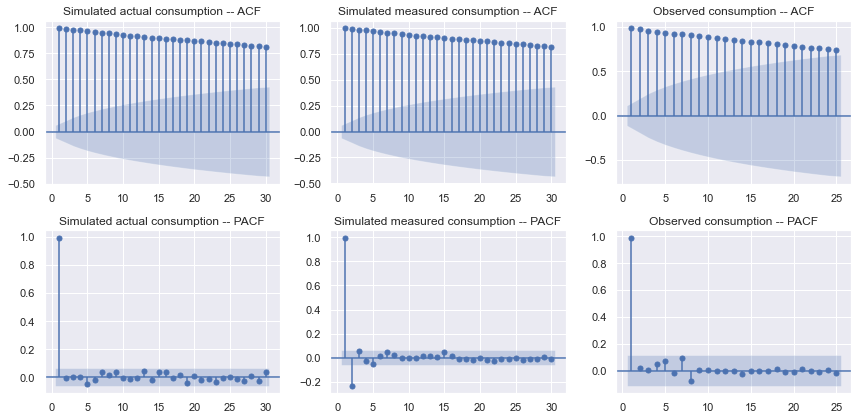

In [12]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=3,
                         figsize=(12,6),
                         sharex=False)

plot_acf(data_sim['C'],
         ax=axes[0][0],
         title='Simulated actual consumption -- ACF',
         zero=False)
plot_pacf(data_sim['C'],
          ax=axes[1][0],
         title='Simulated actual consumption -- PACF',
         zero=False)

plot_acf(data_sim['Chat'],
         ax=axes[0][1],
         title='Simulated measured consumption -- ACF',
         zero=False)
plot_pacf(data_sim['Chat'],
          ax=axes[1][1],
          title='Simulated measured consumption -- PACF',
         zero=False)

plot_acf(data['C'],
         ax=axes[0][2],
         title='Observed consumption -- ACF',
         zero=False)
plot_pacf(data['C'],
          ax=axes[1][2],
          title='Observed consumption -- PACF',
         zero=False)


#axes.set_xlabel('')

#handles, labels = axes[0][0].get_legend_handles_labels()
#fig.legend(handles, 
#           labels,
#           loc='lower center',
#           ncol=2)

plt.tight_layout()
#plt.subplots_adjust(top=0.925)
#plt.subplots_adjust(bottom=0.175)

plt.savefig(directory_figures+'q4.png',
            bbox_inches='tight',
            dpi=150)